DESCRIPTIVE STATISTICS

Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Median:
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64


<Figure size 1200x600 with 0 Axes>

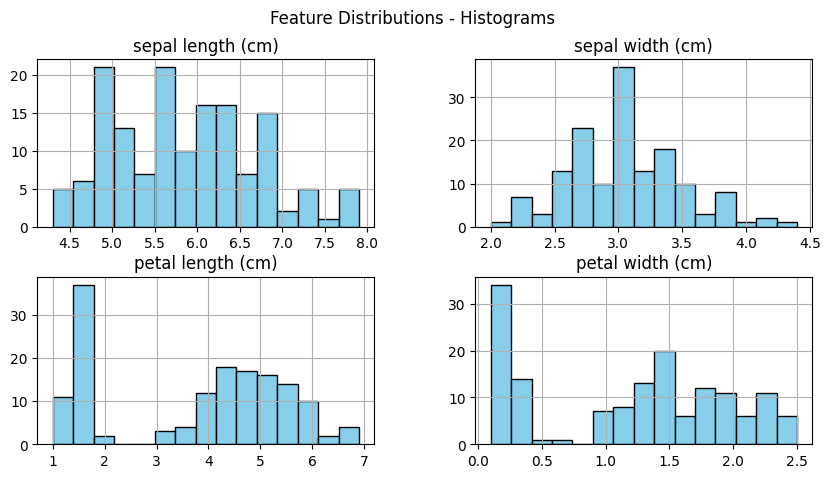

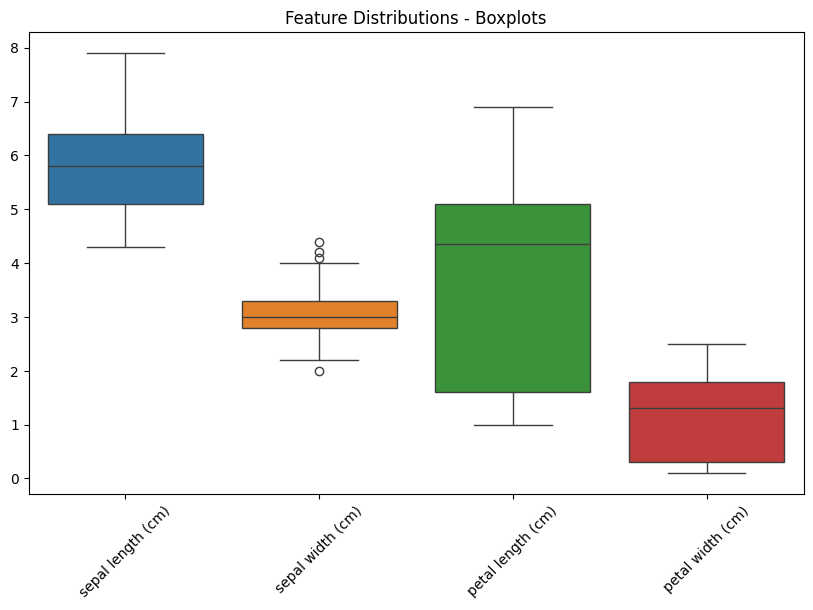


Correlation Matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


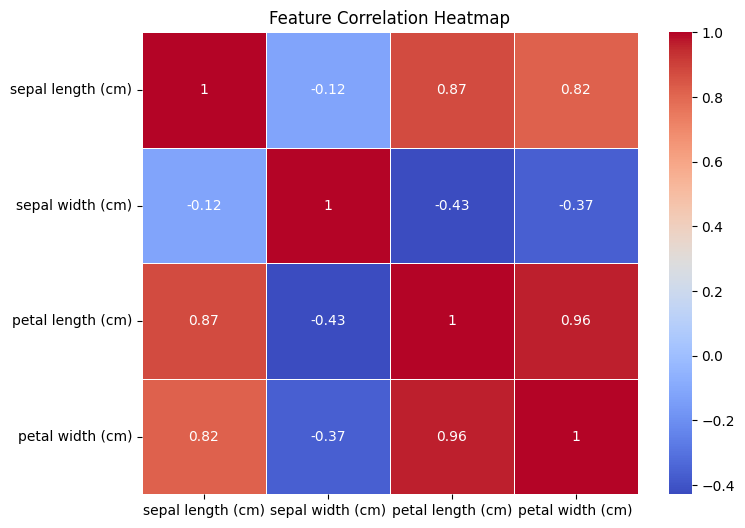

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# a. Compute mean, median, and standard deviation
print("Descriptive Statistics:")
print(df.describe())  # Includes mean and std
print("\nMedian:\n", df.median())

# b. Create histograms and boxplots
plt.figure(figsize=(12, 6))
df.hist(bins=15, color="skyblue", edgecolor="black", figsize=(10, 5))
plt.suptitle("Feature Distributions - Histograms")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Feature Distributions - Boxplots")
plt.xticks(rotation=45)
plt.show()

# c. Compute the correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# d. Visualizing correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Conditional Probability Calculation

In [4]:
# Given contingency table
A_and_B = 30
A_and_notB = 20
notA_and_B = 50
notA_and_notB = 100

# Total probabilities
P_B = (A_and_B + notA_and_B) / (A_and_B + A_and_notB + notA_and_B + notA_and_notB)
P_A = (A_and_B + A_and_notB) / (A_and_B + A_and_notB + notA_and_B + notA_and_notB)

# Compute conditional probabilities
P_A_given_B = A_and_B / (A_and_B + notA_and_B)  # P(A | B)
P_B_given_A = A_and_B / (A_and_B + A_and_notB)  # P(B | A)

print(f"P(A | B) = {P_A_given_B:.2f}")
print(f"P(B | A) = {P_B_given_A:.2f}")


P(A | B) = 0.38
P(B | A) = 0.60


Bayes’ Theorem for Spam Detection 📧

In [5]:
# Given probabilities
P_Spam = 0.2
P_NotSpam = 0.8
P_Keyword_given_Spam = 0.7
P_Keyword_given_NotSpam = 0.1

# Compute P(Keyword)
P_Keyword = (P_Keyword_given_Spam * P_Spam) + (P_Keyword_given_NotSpam * P_NotSpam)

# Compute P(Spam | Keyword) using Bayes’ Theorem
P_Spam_given_Keyword = (P_Keyword_given_Spam * P_Spam) / P_Keyword

print(f"P(Spam | Keyword) = {P_Spam_given_Keyword:.2f}")


P(Spam | Keyword) = 0.64


Outlier Detection, Removal, and Feature Scaling 

Outliers Detected:
    Price  Size
6   1000  4000


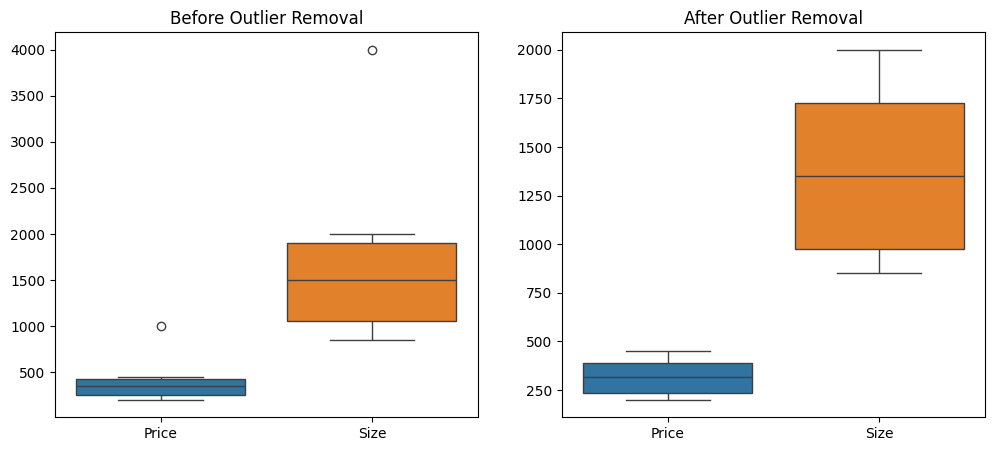

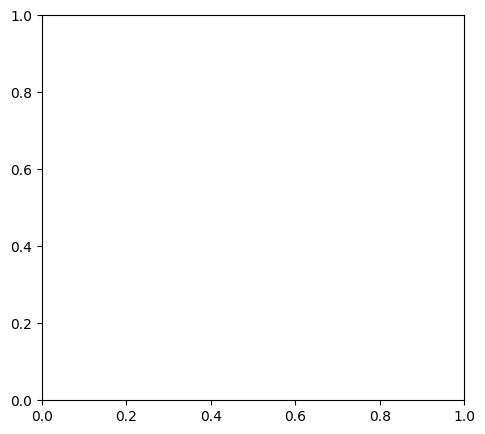

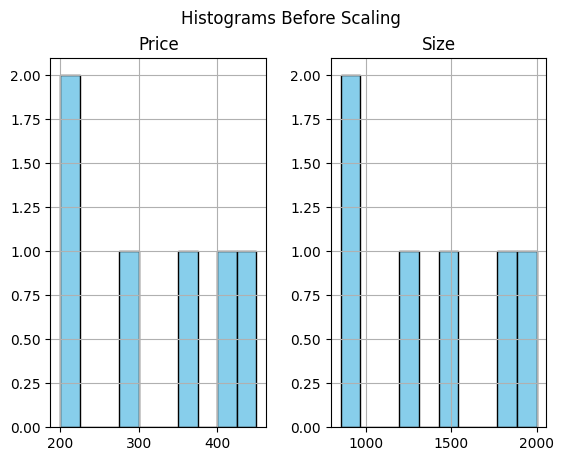

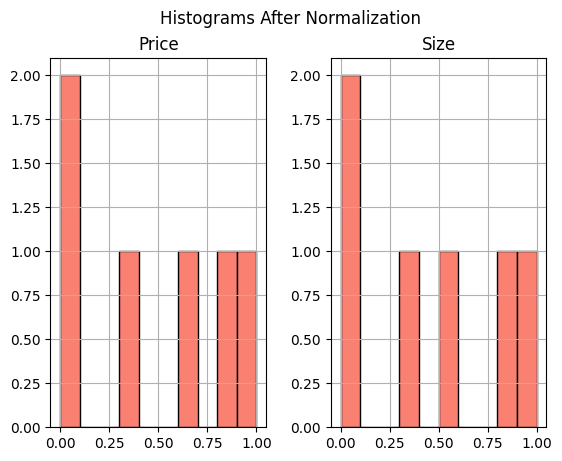

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load a sample dataset (Housing Prices)
data = {
    "Price": [200, 220, 280, 350, 400, 450, 1000],  # Outlier at 1000
    "Size": [850, 900, 1200, 1500, 1800, 2000, 4000],  # Outlier at 4000
}

df = pd.DataFrame(data)

# Compute Q1, Q3, and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((df < lower_bound) | (df > upper_bound))
print("Outliers Detected:\n", df[outliers.any(axis=1)])

# Remove outliers
df_cleaned = df[~outliers.any(axis=1)]

# Boxplot before and after outlier removal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df)
plt.title("Before Outlier Removal")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned)
plt.title("After Outlier Removal")

plt.show()

# Apply Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Apply Standardization (Z-score scaling)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Plot histograms before and after normalization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df_cleaned.hist(bins=10, color="skyblue", edgecolor="black")
plt.suptitle("Histograms Before Scaling")

plt.subplot(1, 2, 2)
df_normalized.hist(bins=10, color="salmon", edgecolor="black")
plt.suptitle("Histograms After Normalization")

plt.show()
